In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('British-Airways_Summer_Schedule_Dataset.xlsx')

In [2]:
print("Dataset shape:", df.shape)

Dataset shape: (10000, 17)


In [3]:
print(df.columns.tolist())

['FLIGHT_DATE', 'FLIGHT_TIME', 'TIME_OF_DAY', 'AIRLINE_CD', 'FLIGHT_NO', 'DEPARTURE_STATION_CD', 'ARRIVAL_STATION_CD', 'ARRIVAL_COUNTRY', 'ARRIVAL_REGION', 'HAUL', 'AIRCRAFT_TYPE', 'FIRST_CLASS_SEATS', 'BUSINESS_CLASS_SEATS', 'ECONOMY_SEATS', 'TIER1_ELIGIBLE_PAX', 'TIER2_ELIGIBLE_PAX', 'TIER3_ELIGIBLE_PAX']


In [4]:
print(df.head())

  FLIGHT_DATE FLIGHT_TIME TIME_OF_DAY AIRLINE_CD FLIGHT_NO  \
0  2025-09-02    14:19:00   Afternoon         BA    BA5211   
1  2025-06-10    06:42:00     Morning         BA    BA7282   
2  2025-10-27    15:33:00   Afternoon         BA    BA1896   
3  2025-06-15    18:29:00     Evening         BA    BA5497   
4  2025-08-25    20:35:00     Evening         BA    BA1493   

  DEPARTURE_STATION_CD ARRIVAL_STATION_CD ARRIVAL_COUNTRY ARRIVAL_REGION  \
0                  LHR                LAX             USA  North America   
1                  LHR                LAX             USA  North America   
2                  LHR                FRA         Germany         Europe   
3                  LHR                IST          Turkey         Europe   
4                  LHR                FRA         Germany         Europe   

    HAUL AIRCRAFT_TYPE  FIRST_CLASS_SEATS  BUSINESS_CLASS_SEATS  \
0   LONG          B777                  8                    49   
1   LONG          B777              

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   FLIGHT_DATE           10000 non-null  datetime64[ns]
 1   FLIGHT_TIME           10000 non-null  object        
 2   TIME_OF_DAY           10000 non-null  object        
 3   AIRLINE_CD            10000 non-null  object        
 4   FLIGHT_NO             10000 non-null  object        
 5   DEPARTURE_STATION_CD  10000 non-null  object        
 6   ARRIVAL_STATION_CD    10000 non-null  object        
 7   ARRIVAL_COUNTRY       10000 non-null  object        
 8   ARRIVAL_REGION        10000 non-null  object        
 9   HAUL                  10000 non-null  object        
 10  AIRCRAFT_TYPE         10000 non-null  object        
 11  FIRST_CLASS_SEATS     10000 non-null  int64         
 12  BUSINESS_CLASS_SEATS  10000 non-null  int64         
 13  ECONOMY_SEATS    

In [6]:
df.describe()

,FLIGHT_DATE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2025-07-14 07:04:04.800000,1.547200,25.073800,198.385900,0.607700,7.951900,30.421400
min,2025-04-01 00:00:00,0.000000,0.000000,160.000000,0.000000,0.000000,0.000000
25%,2025-05-22 00:00:00,0.000000,8.000000,167.000000,0.000000,4.000000,20.000000
50%,2025-07-13 00:00:00,0.000000,17.000000,175.000000,0.000000,8.000000,30.000000
75%,2025-09-06 00:00:00,0.000000,35.000000,180.000000,1.000000,11.000000,41.000000
max,2025-10-30 00:00:00,14.000000,97.000000,358.000000,20.000000,29.000000,92.000000
std,NaN,3.625395,22.142348,53.653478,1.006232,5.130752,15.284233


In [7]:
key_columns = []
for col in df.columns:
    col_lower = col.lower()
    if any(keyword in col_lower for keyword in ['destination', 'dest', 'arrival', 'to']):
        key_columns.append(col)
        print(f"Destination-related: {col}")
    elif any(keyword in col_lower for keyword in ['departure', 'depart', 'time', 'schedule']):
        key_columns.append(col)
        print(f"Departure Time-related: {col}")
    elif any(keyword in col_lower for keyword in ['flight', 'type', 'aircraft', 'service']):
        key_columns.append(col)
        print(f"Flight Type-related: {col}")
    elif any(keyword in col_lower for keyword in ['route', 'origin', 'from']):
        key_columns.append(col)
        print(f"Route Origin-related: {col}")
print(f"Identified {len(set(key_columns))} key columns")

Flight Type-related: FLIGHT_DATE
Departure Time-related: FLIGHT_TIME
Departure Time-related: TIME_OF_DAY
Flight Type-related: FLIGHT_NO
Departure Time-related: DEPARTURE_STATION_CD
Destination-related: ARRIVAL_STATION_CD
Destination-related: ARRIVAL_COUNTRY
Destination-related: ARRIVAL_REGION
Flight Type-related: AIRCRAFT_TYPE
Identified 9 key columns


In [8]:
if key_columns:
    unique_key_cols = list(set(key_columns))
    print("Sample data for key columns:")
    display(df[unique_key_cols].head(10))
else:
    print("Let's examine all columns to identify the relevant ones:")
    display(df.head())

Sample data for key columns:


,DEPARTURE_STATION_CD,ARRIVAL_REGION,FLIGHT_TIME,FLIGHT_DATE,FLIGHT_NO,TIME_OF_DAY,ARRIVAL_COUNTRY,ARRIVAL_STATION_CD,AIRCRAFT_TYPE
0,LHR,North America,14:19:00,2025-09-02,BA5211,Afternoon,USA,LAX,B777
1,LHR,North America,06:42:00,2025-06-10,BA7282,Morning,USA,LAX,B777
2,LHR,Europe,15:33:00,2025-10-27,BA1896,Afternoon,Germany,FRA,A320
3,LHR,Europe,18:29:00,2025-06-15,BA5497,Evening,Turkey,IST,A320
4,LHR,Europe,20:35:00,2025-08-25,BA1493,Evening,Germany,FRA,A320
5,LHR,Europe,19:08:00,2025-07-12,BA4954,Evening,Austria,VIE,A320
6,LHR,Europe,21:44:00,2025-09-16,BA9840,Evening,Netherlands,AMS,A320
7,LHR,North America,14:50:00,2025-04-24,BA7116,Afternoon,USA,ORD,A350
8,LHR,Europe,12:13:00,2025-05-17,BA4424,Lunchtime,Germany,FRA,A320
9,LHR,Europe,09:55:00,2025-05-01,BA4878,Morning,Turkey,IST,A320


In [9]:
print("Analyzing potential destination and route columns...")
for col in df.columns:
    unique_count = df[col].nunique()
    if unique_count > 1 and unique_count < len(df) * 0.8: # Likely categorical
        print(f"{col}: {unique_count} unique values")
        if unique_count <= 20:
            print(f"Values: {df[col].unique()[:10]}")
        else:
            print(f"Sample values: {df[col].unique()[:10]}")

Analyzing potential destination and route columns...
FLIGHT_DATE: 210 unique values
Sample values: <DatetimeArray>
['2025-09-02 00:00:00', '2025-06-10 00:00:00', '2025-10-27 00:00:00',
 '2025-06-15 00:00:00', '2025-08-25 00:00:00', '2025-07-12 00:00:00',
 '2025-09-16 00:00:00', '2025-04-24 00:00:00', '2025-05-17 00:00:00',
 '2025-05-01 00:00:00']
Length: 10, dtype: datetime64[ns]
FLIGHT_TIME: 1020 unique values
Sample values: [datetime.time(14, 19) datetime.time(6, 42) datetime.time(15, 33)
 datetime.time(18, 29) datetime.time(20, 35) datetime.time(19, 8)
 datetime.time(21, 44) datetime.time(14, 50) datetime.time(12, 13)
 datetime.time(9, 55)]
TIME_OF_DAY: 4 unique values
Values: ['Afternoon' 'Morning' 'Evening' 'Lunchtime']
FLIGHT_NO: 6037 unique values
Sample values: ['BA5211' 'BA7282' 'BA1896' 'BA5497' 'BA1493' 'BA4954' 'BA9840' 'BA7116'
 'BA4424' 'BA4878']
ARRIVAL_STATION_CD: 15 unique values
Values: ['LAX' 'FRA' 'IST' 'VIE' 'AMS' 'ORD' 'MUC' 'HND' 'CDG' 'ZRH']
ARRIVAL_COUNTRY: 10 

Possible destination columns: ['ARRIVAL_STATION_CD', 'ARRIVAL_COUNTRY', 'ARRIVAL_REGION']
Possible origin columns: ['DEPARTURE_STATION_CD']
Analyzing destinations using column: ARRIVAL_STATION_CD
Top 10 destinations:
ARRIVAL_STATION_CD
FRA    714
MUC    691
DXB    688
VIE    682
HND    679
ORD    675
MAD    673
LAX    666
JFK    664
DFW    653
Name: count, dtype: int64


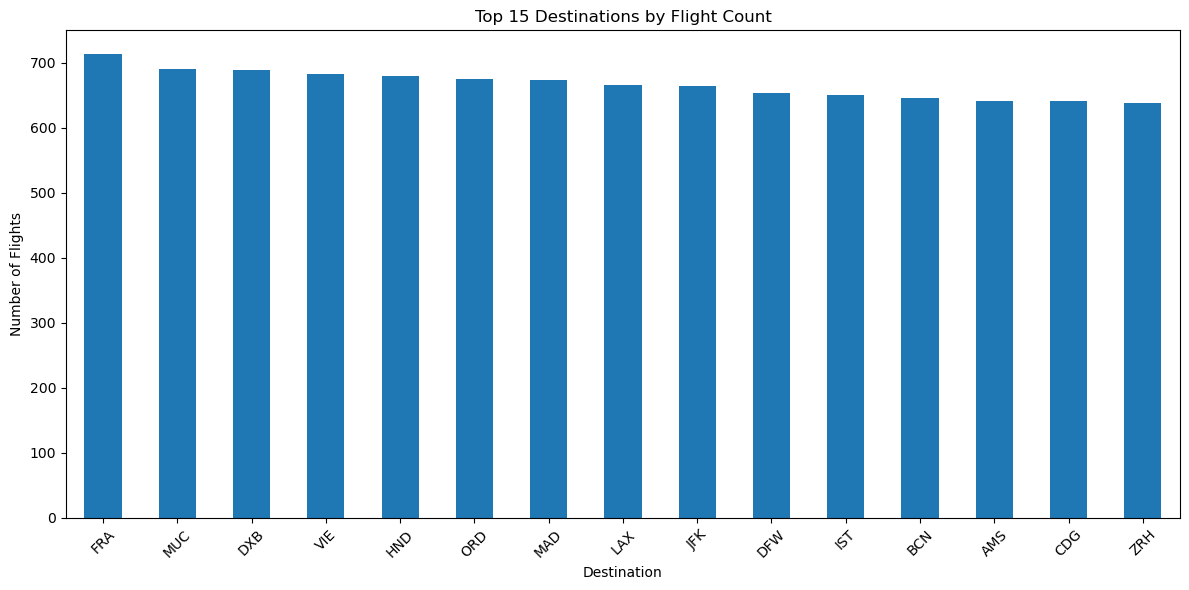

In [10]:
route_analysis = {}
# Try to identify route/destination columns
possible_dest_cols = [col for col in df.columns if any(word in col.lower()
                                                       for word in ['dest', 'to', 'arrival', 'airport'])]
possible_origin_cols = [col for col in df.columns if any(word in col.lower()
for word in ['origin', 'from', 'departure', 'depart'])]
print("Possible destination columns:", possible_dest_cols)
print("Possible origin columns:", possible_origin_cols)
# If we find destination columns, analyze them
if possible_dest_cols:
    dest_col = possible_dest_cols[0]
    print(f"Analyzing destinations using column: {dest_col}")
    dest_counts = df[dest_col].value_counts()
    print(f"Top 10 destinations:")
    print(dest_counts.head(10))
    # Plot top destinations
    plt.figure(figsize=(12, 6))
    dest_counts.head(15).plot(kind='bar')
    plt.title('Top 15 Destinations by Flight Count')
    plt.xlabel('Destination')
    plt.ylabel('Number of Flights')
    plt.xticks(rotation=45)
    plt.tight_layout()

Europe: 4042 flights to 6 destinations
North America: 2658 flights to 4 destinations
Middle East: 688 flights to 1 destinations
Other: 2612 flights to 4 destinations


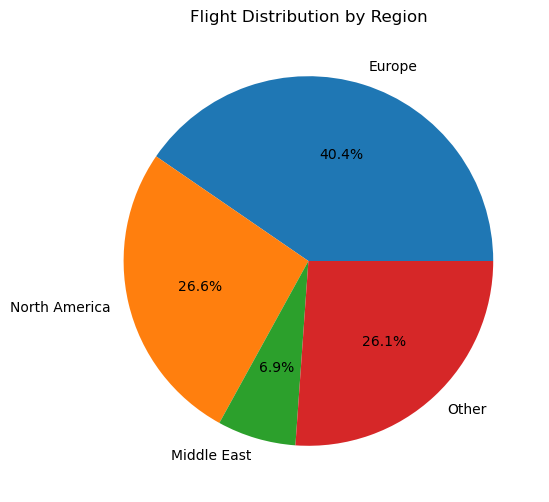

In [11]:
# Regional analysis - try to categorize destinations by region
if possible_dest_cols:
    dest_col = possible_dest_cols[0]
    destinations = df[dest_col].unique()

    # Simple regional categorization based on common airport codes/city names
    regions = {'Europe': [], 'North America': [], 'Asia': [], 'Middle East': [], 'Africa': [], 'Other': []}

    # European destinations (common patterns)
    european_patterns = ['LHR', 'CDG', 'FRA', 'AMS', 'MAD', 'FCO', 'MUC', 'ZUR', 'VIE', 'CPH', 'ARN', 'OSL', 'HEL']
    # North American
    na_patterns = ['JFK', 'LAX', 'ORD', 'DFW', 'YYZ', 'YVR', 'SFO', 'BOS', 'MIA', 'SEA']
    # Asian
    asian_patterns = ['NRT', 'ICN', 'PVG', 'HKG', 'SIN', 'BKK', 'DEL', 'BOM', 'KUL']
    # Middle East
    me_patterns = ['DXB', 'DOH', 'AUH', 'KWI', 'RUH', 'CAI']
    # Africa
    africa_patterns = ['JNB', 'CPT', 'LOS', 'ACC', 'NBO', 'ADD']

    for dest in destinations:
        dest_str = str(dest).upper()
        if any(pattern in dest_str for pattern in european_patterns):
            regions['Europe'].append(dest)
        elif any(pattern in dest_str for pattern in na_patterns):
            regions['North America'].append(dest)
        elif any(pattern in dest_str for pattern in asian_patterns):
            regions['Asia'].append(dest)
        elif any(pattern in dest_str for pattern in me_patterns):
            regions['Middle East'].append(dest)
        elif any(pattern in dest_str for pattern in africa_patterns):
            regions['Africa'].append(dest)
        else:
            regions['Other'].append(dest)

    # Count flights by region
    region_counts = {}
    for region, dests in regions.items():
        if dests:
            count = df[df[dest_col].isin(dests)].shape[0]
            region_counts[region] = count
            print(f"{region}: {count} flights to {len(dests)} destinations")

    # Plot regional distribution
    if region_counts:
        plt.figure(figsize=(10, 6))
        regions_df = pd.Series(region_counts)
        regions_df.plot(kind='pie', autopct='%1.1f%%')
        plt.title('Flight Distribution by Region')
        plt.ylabel('')

In [12]:
# Analyze flight timing patterns
time_cols = [col for col in df.columns if any(word in col.lower()
for word in ['time', 'hour', 'departure', 'arrival', 'schedule'])]

print("Time-related columns:", time_cols)

if time_cols:
    for col in time_cols[:2]:  # Analyze first 2 time columns
        print(f"Analyzing {col}:")
        print(f"Sample values: {df[col].head(10).tolist()}")
        print(f"Data type: {df[col].dtype}")

        # Try to extract hour information if it's time data
        try:
            if df[col].dtype == 'object':
                # Try to parse as time
                time_series = pd.to_datetime(df[col], errors='coerce')
                if not time_series.isna().all():
                    hours = time_series.dt.hour
                    hour_counts = hours.value_counts().sort_index()

                    plt.figure(figsize=(12, 6))
                    hour_counts.plot(kind='bar')
                    plt.title(f'Flight Distribution by Hour - {col}')
                    plt.xlabel('Hour of Day')
                    plt.ylabel('Number of Flights')
                    plt.xticks(rotation=0)
                    plt.tight_layout()

        except Exception as e:
            print(f"Could not parse time data: {e}")

Time-related columns: ['FLIGHT_TIME', 'TIME_OF_DAY', 'DEPARTURE_STATION_CD', 'ARRIVAL_STATION_CD', 'ARRIVAL_COUNTRY', 'ARRIVAL_REGION']
Analyzing FLIGHT_TIME:
Sample values: [datetime.time(14, 19), datetime.time(6, 42), datetime.time(15, 33), datetime.time(18, 29), datetime.time(20, 35), datetime.time(19, 8), datetime.time(21, 44), datetime.time(14, 50), datetime.time(12, 13), datetime.time(9, 55)]
Data type: object
Analyzing TIME_OF_DAY:
Sample values: ['Afternoon', 'Morning', 'Afternoon', 'Evening', 'Evening', 'Evening', 'Evening', 'Afternoon', 'Lunchtime', 'Morning']
Data type: object


C:\Users\lionh\AppData\Local\Temp\ipykernel_2804\1774780253.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series = pd.to_datetime(df[col], errors='coerce')


In [13]:
print("=== DATASET SUMMARY ===")
print(f"Total number of flights: {len(df)}")
print(f"Total number of columns: {len(df.columns)}")

if possible_dest_cols:
    dest_col = possible_dest_cols[0]
    print(f"Destination Analysis (using {dest_col}):")
    print(f"- Total unique destinations: {df[dest_col].nunique()}")
    print(f"- Most frequent destination: {df[dest_col].mode().iloc[0]} ({df[dest_col].value_counts().iloc[0]} flights)")
    print(f"- Average flights per destination: {len(df) / df[dest_col].nunique():.1f}")

aircraft_cols = [col for col in df.columns if any(word in col.lower() 
                 for word in ['aircraft', 'plane', 'type', 'equipment', 'model'])]
if aircraft_cols:
    print(f"Aircraft/Flight Type Analysis:")
    for col in aircraft_cols[:2]:
        print(f"- {col}: {df[col].nunique()} unique values")
        if df[col].nunique() <= 10:
            print(f"  Values: {df[col].value_counts().to_dict()}")

print("\n=== END SUMMARY ===")

=== DATASET SUMMARY ===
Total number of flights: 10000
Total number of columns: 17
Destination Analysis (using ARRIVAL_STATION_CD):
- Total unique destinations: 15
- Most frequent destination: FRA (714 flights)
- Average flights per destination: 666.7
Aircraft/Flight Type Analysis:
- AIRCRAFT_TYPE: 5 unique values
  Values: {'A320': 5975, 'B777': 1878, 'B787': 1236, 'A350': 535, 'A380': 376}

=== END SUMMARY ===
